In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simple RNN

## Creating Sine Waves

**numpy.linspace**(start, stop, num = 50, endpoint = True, retstep = False, dtype = None) :

Returns number spaces evenly w.r.t interval. Similar to arange but instead of step it uses sample number.

In [138]:
x =  np.linspace(0,50,501)
x # givees 501 numbers spaced evenly from 0 to 50

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [139]:
len(x)

501

In [140]:
np.sin(120)

0.5806111842123143

In [141]:
# now creating sine wave out of the evenly spaced x

y = np.sin(x)
y[:20]

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691,
       0.84147098, 0.89120736, 0.93203909, 0.96355819, 0.98544973,
       0.99749499, 0.9995736 , 0.99166481, 0.97384763, 0.94630009])

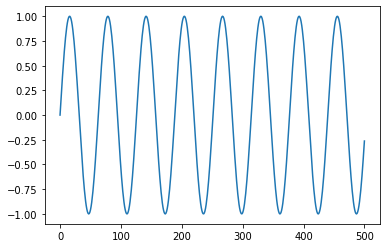

In [142]:
plt.plot(y);

Turning **y** into DataFrame

In [143]:
df = pd.DataFrame(data=y, index=x, columns=['sine'])
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Creating Train Test Splits

In [144]:
len(df)

501

In [0]:
test_percent = 0.1

In [146]:
# 10 percent of our data points out of 501
len(df)*test_percent

50.1

In [147]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [148]:
test_index = int(len(df) - test_point)
test_index

451

In [0]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [150]:
train

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [151]:
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [152]:
len(train), len(test)

(451, 50)

## Normalizing

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [154]:
scaled_train[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

In [155]:
scaled_test[:10]

array([[0.94955134],
       [0.96915662],
       [0.98407422],
       [0.99415511],
       [0.99929856],
       [0.99945317],
       [0.9946174 ],
       [0.98483957],
       [0.97021737],
       [0.95089691]])

## Creating Batches

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, # x
                                scaled_train, # y
                                length = length,
                                batch_size = batch_size
                                )

In [157]:
len(scaled_train)

451

In [158]:
len(generator)

401

In [0]:
X, y = generator[0]

In [160]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [161]:
y

array([[0.02053313]])

this essentially saying given 25 data points in X (length = 25) predict 26th data point in future which is y

In [162]:
scaled_train[:5]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985]])

In [163]:
len(X[0]), len(y)

(50, 1)

## Modelling

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM


n_features = 1 # predicting only 1 feature

model = Sequential()

model.add(SimpleRNN(50,
                    input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse')

In [165]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [166]:
model.fit_generator(generator,
                    epochs=5)

Epoch 1/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0057
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 7.5168e-05
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 3.6967e-04
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 5.3476e-05
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 1.2108e-05


In [167]:
losses = pd.DataFrame(model.history.history)
losses

,loss
0,0.005694
1,0.000075
2,0.000370
3,0.000053
4,0.000012


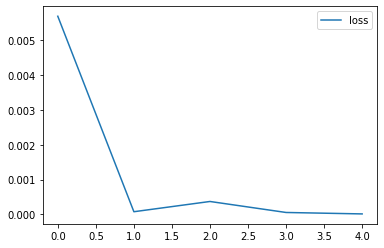

In [168]:
losses.plot()

## Evaluating

In [169]:
first_eval_batch = scaled_train[-length:]
len(first_eval_batch)

50

In [170]:
l = [1,2,3,4,5,6,7,8,9,0]
l[-3:]

[8, 9, 0]

In [171]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [0]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [173]:
model.predict(first_eval_batch)

array([[0.9520313]], dtype=float32)

In [174]:
scaled_test[0]

array([0.94955134])

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [176]:
first_eval_batch.shape, current_batch.shape

((50, 1), (1, 50, 1))

In [0]:
# first_eval_batch

In [0]:
#  predicted_value = [[[99]]]
#  np.append(current_batch[:,1:,:], predicted_value, axis=1)

In [179]:
test_predictions

[array([0.9520313], dtype=float32),
 array([0.9726594], dtype=float32),
 array([0.9872673], dtype=float32),
 array([0.9982373], dtype=float32),
 array([1.0045012], dtype=float32),
 array([1.0047013], dtype=float32),
 array([0.9993533], dtype=float32),
 array([0.98961693], dtype=float32),
 array([0.97448665], dtype=float32),
 array([0.95362574], dtype=float32),
 array([0.9285789], dtype=float32),
 array([0.8994647], dtype=float32),
 array([0.86602545], dtype=float32),
 array([0.82876414], dtype=float32),
 array([0.78874594], dtype=float32),
 array([0.7465803], dtype=float32),
 array([0.70203483], dtype=float32),
 array([0.65528554], dtype=float32),
 array([0.6075801], dtype=float32),
 array([0.55928934], dtype=float32),
 array([0.5100322], dtype=float32),
 array([0.46044037], dtype=float32),
 array([0.41179016], dtype=float32),
 array([0.36391258], dtype=float32),
 array([0.31652847], dtype=float32),
 array([0.27114972], dtype=float32),
 array([0.22881371], dtype=float32),
 array([0.188

In [180]:
len(test_predictions)

50

In [0]:
true_preds = scaler.inverse_transform(test_predictions)

In [182]:
test['predictions'] = true_preds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [183]:
test

,sine,predictions
45.1,0.899097,0.904057
45.2,0.938307,0.945313
45.3,0.968142,0.974529
45.4,0.988304,0.996468
45.5,0.998591,1.008996
45.6,0.998900,1.009396
45.7,0.989229,0.998700
45.8,0.969673,0.979228
45.9,0.940429,0.948967
46.0,0.901788,0.907246


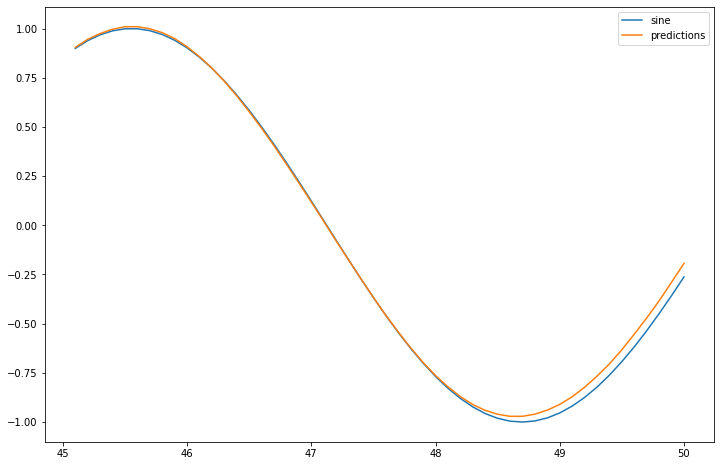

In [184]:
test.plot(figsize=(12,8));

# LSTM

## Callbacks

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=1)

## Creating generator for train and validaiton data



In [0]:
length = 49 # length should be shorter than the test data
            # size of our test data is 50

generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=length,
                                batch_size=batch_size)

validation_generator = TimeseriesGenerator(scaled_test,
                                            scaled_test,
                                            length=length,
                                            batch_size=batch_size)

## Modelling

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM


n_features = 1 # predicting only 1 feature

model = Sequential()

model.add(LSTM(50,
                    input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse')

In [188]:
model.fit_generator(generator,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stopping])

Epoch 1/20
402/402 [==============================] - 6s 16ms/step - loss: 0.0205 - val_loss: 1.4146e-05
Epoch 2/20
402/402 [==============================] - 6s 15ms/step - loss: 2.4349e-04 - val_loss: 8.5633e-06
Epoch 3/20
402/402 [==============================] - 6s 15ms/step - loss: 1.1925e-04 - val_loss: 3.1737e-06
Epoch 4/20
402/402 [==============================] - 6s 15ms/step - loss: 2.3579e-04 - val_loss: 4.8438e-04


In [189]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.020517,0.000014
1,0.000243,0.000009
2,0.000119,0.000003
3,0.000236,0.000484


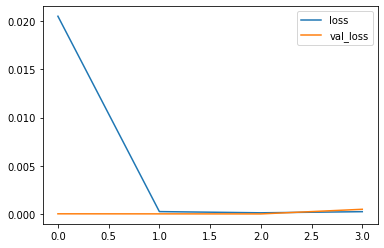

In [190]:
losses.plot();

## Evaluating 

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


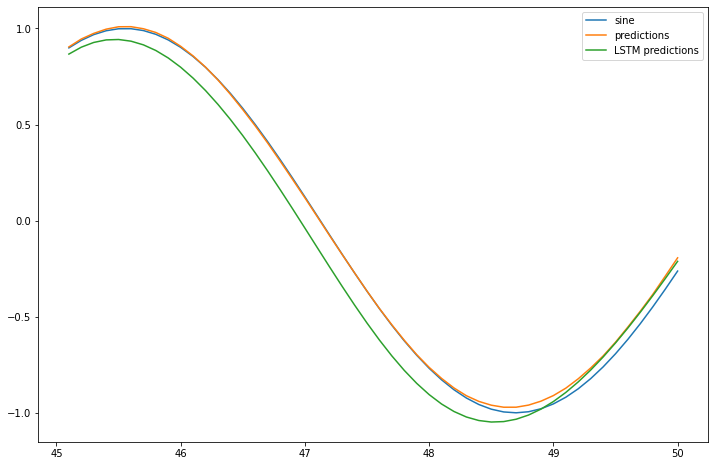

In [192]:
true_preds = scaler.inverse_transform(test_predictions)
test['LSTM predictions'] = true_preds
test.plot(figsize=(12,8))

# Performing on full data set

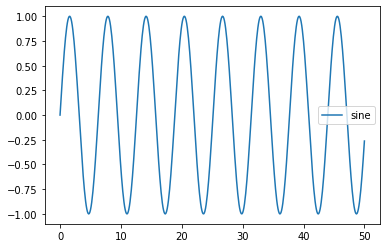

In [194]:
df.plot();

In [0]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [0]:
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data,
                                length=length,
                                batch_size=batch_size)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM


n_features = 1 # predicting only 1 feature

model = Sequential()

model.add(LSTM(50,
                    input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mse')

In [199]:
model.fit_generator(generator,
                    epochs=5,
                    )

Epoch 1/5
452/452 [==============================] - 6s 14ms/step - loss: 3.2799e-05
Epoch 2/5
452/452 [==============================] - 7s 15ms/step - loss: 2.2702e-05
Epoch 3/5
452/452 [==============================] - 6s 14ms/step - loss: 1.7617e-05
Epoch 4/5
452/452 [==============================] - 6s 14ms/step - loss: 2.4540e-05
Epoch 5/5
452/452 [==============================] - 6s 14ms/step - loss: 4.0474e-04


In [0]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [0]:
forecast = scaler.inverse_transform(forecast)

In [213]:
forecast  

array([[-0.16406013],
       [-0.06286799],
       [ 0.03932538],
       [ 0.14155237],
       [ 0.24281198],
       [ 0.34208617],
       [ 0.43835596],
       [ 0.53062023],
       [ 0.61791399],
       [ 0.69932565],
       [ 0.7740148 ],
       [ 0.84122612],
       [ 0.90029946],
       [ 0.9506819 ],
       [ 0.99193049],
       [ 1.02371239],
       [ 1.04580646],
       [ 1.05809445],
       [ 1.06055754],
       [ 1.05326604],
       [ 1.0363716 ],
       [ 1.01009879],
       [ 0.97473874],
       [ 0.93064084],
       [ 0.87821027]])

In [214]:
25 * 0.1

2.5

In [0]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

In [216]:
len(forecast_index)

25

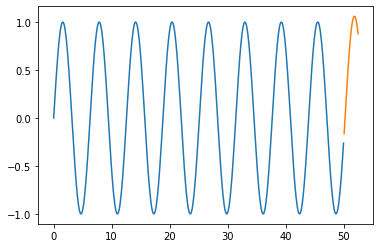

In [218]:
 plt.plot(df.index, df['sine'])
 plt.plot(forecast_index, forecast);